# Importing Required Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')

# 1 Understanding the dataset : **Indian Airlines Dataset**
* Load the Dataset and then Understand the dataset using pandas to know the basic information,shape(rows,columns),datatypes,descriptive summary,etc.,
* Extract all the ibnformation needed to understand the data completely.

In [13]:
def load_and_describe(file_name):

    try:
        df=pd.read_csv(file_name)

        '''DATA DESCRIPTION'''
        print('='*30,'1.Data Description:','='*30)
        
        print('\n','-'*20,'Dataset Head:','--'*20,'\n')
        print(df.head())
        
        print('\n','-'*20,'Basic Information:','-'*20,'\n')
        print(df.info())
        
        print('\n','-'*20,'Summary Statistics:','-'*20,'\n')
        print(df.describe())

        print('\n','-'*20,'Data Types:','-'*20,'\n')
        print(df.dtypes)
        
        print('\n','-'*20,'Skewness:','-'*20,'\n')
        print(df.skew(numeric_only=True))
        
        print('\n','-'*20,'Kurtosis:','-'*20,'\n')
        print(df.kurt(numeric_only=True))

        return df
        
    except Exception as e:
        print(f'error loading the data:{e}')
        return none 
     

# 2. Data Cleaning & Preprocessing

* After Understanding the data completely now we have a complete information about the data.
* Now, We can Check for the Duplicates and if any we can drop them using pandas methods.
* Next, Check for the missing values in the data, if Present then impute them with mean,meadian,mode,or anything according to the column of the dataset.
* Then, Check for Outliers, if Present then treat the outliers by replacing them with mean nothing but Q2 as we done below.
- Extract journey day/month
- Convert duration and time to numeric
- Handle missing or inconsistent values
- Remove duplicates

In [14]:
def clean_data(df):

    # ----------------1. Drop unnecessary column--------------------------
    cleaned_df = df.drop(columns=['Unnamed: 0'])

    # ---------------- 2. Convert departure_time and arrival_time from categories to numeric (hours)  ---------------- #
    time_map = {
        'Early_Morning': 5,
        'Morning': 9,
        'Afternoon': 14,
        'Evening': 18,
        'Night': 21,
        'Late_Night': 0
    }
    
    cleaned_df['departure_time (hours)'] = df['departure_time'].map(time_map)
    cleaned_df['arrival_time (hours)'] = df['arrival_time'].map(time_map)

    # ---------------- Convert duration like 2.17 → 2 hr 17 min  to total minutes for better understanding---------------- #
    # a) spliting the hours and minutes
    cleaned_df['duration (hours)'] = df['duration'].apply(lambda x: int(x))
    cleaned_df['duration (minutes)'] = df['duration'].apply(lambda x: int(round((x - int(x)) * 100)))

    # b) converting total duration into  minutes
    cleaned_df['total_duration (minutes)'] = cleaned_df['duration (hours)'] * 60 + cleaned_df['duration (minutes)']
    

    #------------------3.duplicate values detection----------------------------------
    print('\n','-'*10,'checking for duplicate values:','-'*10,'\n')
    print(f'Duplicate Values:{df.duplicated().sum()}','\n')

    #duplicate values treatment by droping 
    df=df.drop_duplicates()

    print('\n',f'No Duplicates Present in this Dataset .Remaining rows :{len(df)} ','\n')

    
    #--------------------------------4. missing values detection in percentage----------------------
    print('\n','-'*10,'checking for missing values percentage:','-'*10,'\n')
    print(f'Missing Value percentage :','\n')
    print(f'{round(df.isnull().sum()/len(df) *100,2)}%')

    print('\n',f'No Missing Present in this Dataset .','\n')

    # ------------------------ 5 Create route column -----------------------------------------------------
    cleaned_df['route'] = df['source_city'] + '-' + df['destination_city']


    return cleaned_df

# 3. Exploratory Data Analysis (Python)
- Price distributions (overall and segmented)
- Compare prices across airlines, stops, routes
- Outlier detection (IQR/Z-score)
- Duration vs. price correlation
- Impact of departure time on price using boxplot
- lineplot of departure hour vs price


In [15]:
def eda_analysis(df):

    ''' 1. Histogram -- Distribution of price'''
    plt.figure(figsize=(10,5))
    sns.histplot(df['price'], bins=30, kde=True ,color='lightgreen')
    plt.title('Price Distribution')
    plt.xlabel('Price')
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    ''' 2. Box Plot -- Price Distribution across Airlines'''
    plt.figure(figsize=(10,5))
    sns.boxplot(x='airline',y='price',data=df ,palette='viridis')
    plt.title('Price Distribution across Airlines')
    plt.xlabel('Airline')
    plt.ylabel('Price')
    plt.xticks(rotation=45)  
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

    ''' 3. Bar Plot -- Top 10 Flights by Average Price '''
    plt.figure(figsize=(10,5))
    
    # Group by 'flight' and calculate mean price, then sort and take top 10
    avg_price_per_flight = df.groupby('flight')['price'].mean().sort_values(ascending=False).head(10)
    
    # Plot horizontal bar chart
    avg_price_per_flight.plot(kind='barh', color='blue')
    plt.title('Top 10 Flights by Average Price')
    plt.xlabel('Average Price')
    plt.ylabel('Flight')
    plt.gca().invert_yaxis()  # Optional: highest price on top
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()


    ''' 4. Box Plot -- Price Distribution across Stops'''
    plt.figure(figsize=(10,5))
    sns.boxplot(x='stops', y='price', data=df , palette='Set3')
    plt.title('Price Distribution Across Number of Stops')
    plt.xlabel('Number of Stops')
    plt.ylabel('Price')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

    ''' 5. Bar Plot -- Price Distribution across Routes'''
    # Group by route and calculate average price
    avg_price_per_route = df.groupby('route')['price'].mean().sort_values()
    
    # Plot horizontal bar chart
    plt.figure(figsize=(10,8))
    avg_price_per_route.plot(kind='barh',color='purple')
    plt.title('Average Flight Price by Route')
    plt.xlabel('Average Price')
    plt.ylabel('Route')
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()

    ''' 6 . Box plot ---Price Distribution across class'''
    plt.figure(figsize=(10,5))
    sns.boxplot(x='class',y='price',data=df,palette='Paired')
    plt.title('Price Distribution Across Class')
    plt.xlabel('Class')
    plt.ylabel('Price')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

    ''' 7. Scatterplot between price and duration'''
    plt.figure(figsize=(12,7))
    sns.scatterplot(y=df['total_duration (minutes)'],x=df['price'],data=df,color='teal')
    plt.title('Scatterplot of Duration vs price')
    plt.tight_layout()
    plt.show()

    '''8. Impact of departure time on price'''
    plt.figure(figsize=(12,6))
    sns.boxplot(x='departure_time', y='price', data=df,palette='Accent')
    plt.title('Price vs Departure Time')
    plt.grid(True, axis='y')
    plt.show()

    '''9. Impact of arrival time on price'''
    plt.figure(figsize=(12,6))
    sns.boxplot(x='arrival_time', y='price', data=df,palette='Pastel1')
    plt.title('Price vs Arrival Time')
    plt.grid(True, axis='y')
    plt.show()

    '''10.lineplot departure hour vs price'''
    hourly_avg = df.groupby('departure_time (hours)')['price'].mean().reset_index()
    time_map = {
        'Early_Morning': 5,
        'Morning': 9,
        'Afternoon': 14,
        'Evening': 18,
        'Night': 21,
        'Late_Night': 0
    }
    # Plot
    plt.figure(figsize=(10,5))
    sns.lineplot(x='departure_time (hours)', y='price', data=hourly_avg, marker='o',color='red' )
    plt.title('Average Price vs Departure Hour')
    plt.xlabel('Departure Hour (0–23)')
    plt.ylabel('Average Price')

    legend_text = '\n'.join([f'{k} = {v}' for k, v in time_map.items()])
    plt.legend([legend_text], title='Time Labels', loc='lower right')

    plt.grid(True)
    plt.show()


    '''11.lineplot Arrival hour vs price'''
    plt.figure(figsize=(10,5))
    avg_hourly = df.groupby('arrival_time (hours)')['price'].mean().reset_index()

    sns.lineplot(x='arrival_time (hours)',y='price',data=avg_hourly,marker='o',color='steelblue')
    plt.title('Average Price vs Arrival Hour')
    plt.xlabel('Arrival Hour (0–23)')
    plt.ylabel('Average Price')

    legend_text = '\n'.join([f'{k} = {v}' for k, v in time_map.items()])
    plt.legend([legend_text], title='Time Labels', loc='lower right')
    plt.grid(True)
    plt.show()

    '''12 Outlier detection using (IQR/Z-score) '''
    # Detect outliers using IQR
    Q1 = df['price'].quantile(0.25)
    Q3 = df['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
    print(f'Number of outliers in  Price: {len(outliers)}')

# Interpretation of EDA

In [16]:
def interpretation_eda():
    return ''' GENERATING INSIGHTS :

1. Histogram - Overall Price Distribution :
- Distribution Shape is Right-skewed 
- Price distribution is bimodal: Main peak has most flights  between 5,000-15,000 (economy), and a secondary peak at 50,000-80,000 (business).
- A few prices above ₹80,000 may be business class, or luxury.


2. Box Plot – Price Distribution Across Airlines:
- AirAsia, SpiceJet, Indigo, GO_FIRST has Low and consistent and most affordable prices and Fewer outliers.
- Vistara and Air India have the highest median prices , widest price ranges and many outliers.
- conclusion :  Vistara and Air India offer premium options. Other airlines mostly target budget segments.


3. Bar Graph – Top 10 Flights By Average Price:
- All top 10 flights have the average price above 38,000 only mainly focusing that they are business class or luxury.
- conclusion : AI-433 if the flight having the top most average price among all the flights.


4. Box Plot – Price Distribution Across Stops:
- 0 Stops (Non-stop): Low prices, tightly packed. Some high outliers.
- 1 Stop: Highest variability and higher median price. Outliers above 1,20,000 --> possibly business/international.
- 2+ Stops: Median close to non-stop, but wider spread. Many outliers --> likely due to long flights.
- conclusion : 0 and 2+ stops are cheaper but still contain some expensive flights. 1-stop flights are most expensive.


5. Bar Plot – Average Price by Route:
- Top 5 Expensive Routes:
	* Chennai–Bangalore 
	* Kolkata–Chennai  
	* Bangalore–Kolkata  
	* Bangalore–Chennai  
	* Mumbai–Bangalore
- Lowest Average Prices:
	* Hyderabad–Delhi  
	* Delhi–Hyderabad  
	* Delhi–Bangalore  
	* Bangalore–Delhi  
	* Mumbai–Delhi
- conclusion : Chennai & Kolkata-based routes = expensive and Delhi & Hyderabad = budget-friendly


6. Box Plot – Price Distribution Across Class:
- Economy class median is around 5,000-8,000 and has few outliers above 15,000
- Most economy flights are affordable and stable in price, with limited variation. Outliers may be due to peak season.
- Business class flights cost 4-6x more than economy, with a median around 35,000- 40,000 and has outliers above 70,000.
- Business class shows high variation in pricing, likely influenced by distance, airline, and demand. The presence of many outliers reflects premium services or international routes.
- conclusion : Economy is affordable and Business class is Premium.

7. Scatter Plot – Price Distribution Across Total Duration (minutes):
- The plot shows a slightly increasing pattern, but with high scatter.
- This means as price increases, duration may increase slightly, but it's not consistent.
- High dispersion: At almost every price level, flight durations vary greatly.
- High price != long flight, and vice versa
- Some low-priced long flights – possibly multi-stop or discounts.
- Some high-priced short flights – likely business class or peak time.
- conclusion : Weak positive trend - Price increases --> Duration may increase slightly.


8. Box Plot – Price vs Departure Time:
- Evening, Early Morning, Morning : Wide spread. High outliers.
- Afternoon : Slightly lower median and spread.
- Night : Highest variability.High-priced outliers.
- Late Night : Lowest median. Fewer high-priced flights --> most budget-friendly.
- conclusion :
	* Late-night flights are the cheapest.
	* Night flights are the most expensive followed by Evening , Morning and Early Morning.
	* Afternoon flights are slightly more affordable.


8. Box Plot – Price vs Arrival Time:
- Night, Morning : Wide spread. High outliers.
- Early Morning : Lower median and spread.
- Afternoon : Slightly lower median and spread.
- Evening : Highest variability. High-priced outliers.
- Late Night : Lowest median. Fewer high-priced flights --> most budget-friendly.
- conclusion :
	* Late-night flights are the cheapest followed by Early Morning Flights.
	* Evening flights are the most expensive followed by Morning and Night.
	* Afternoon flights are slightly more affordable.

Conclusion on overall price across departure and arrival times:
- Late night flights (both departure and arrival) are the least expensive and most consistent.
- Night departures and arrivals have the highest median prices and variability.
- Afternoon flights tend to be cheaper and affordable than other times.


9. Line Plot – Average Price vs Departure Hour and Arrival Hour:
- Average price increases sharply for departures after 21:00, peaking at 23:00.
- Arrival prices peak around 14:00 and 21:00.
- Late-night flights are generally more expensive and Night flights are cheaper.


10. Outliers in Price (IQR Method):
- A significant number of price outliers detected (123).
- Most outliers lie on the higher end (60,000+), confirming premium flights.



Summary of Visualizations:
- Vistara and Air India have the highest average prices; Air Asia and Indigo the lowest.
- One-stop flights are the most expensive on average; non-stop are the cheapest.
- Chennai-Bangalore is the most expensive route, followed by Kolkata-Chennai and Bangalore-Kolkata.
- Business class fares are significantly higher than economy across all airlines, especially Vistara.
- Correlation Analysis : Weak positive correlation (0.2) between price and total duration; price and duration are not strongly linked.

KEY INSIGHTS
- Business class flights command a significant premium over economy.
- Route is the strongest price determinant; southern and eastern city pairs are most expensive.
- Vistara and Air India are positioned as premium airlines; Air Asia and Indigo as budget.
- Night departures/arrivals are most expensive; late-night flights are cheapest.
- One-stop flights are more expensive than non-stop, contrary to expectations.
- Price and duration are only weakly correlated.

RECOMMENDATIONS
1. Optimize Route Pricing: Promote premium routes and enhance value on expensive routes.
2. Stopover Pricing: Re-evaluate fare structures for connecting flights, offer discounts  for one-stop flights.
3. Time-of-Day Strategy: Promote off-peak (late night/afternoon) flights, upsell peak (night) flights, and balance load.
'''

# 4. Statistical Analysis

- T-Test: Compare average fare between 0-stop and 1-stop
- ANOVA: Fare variation across multiple airlines
- Correlation between duration and price
- Chi-square: Association between total stops and price category

In [17]:
def statistical_analysis(df):

    '''1. T-TEST'''
    #----------------T-Test: Compare average fare between 0-stop and 1-stop---------------------------------
    print('--'*10,' 1. T-Test : Comparing average fare between Zero-stop and One-stop','--'*10)
    # Filter only rows with 'zero' and 'one' stops
    df_stops = df[df['stops'].isin(['zero', 'one'])]
    
    # Separate price data
    zero_stop_prices = df_stops[df_stops['stops'] == 'zero']['price']
    one_stop_prices = df_stops[df_stops['stops'] == 'one']['price']
    
    # Perform Welch’s T-test (safe for unequal variances)
    t_stat, p_value = ttest_ind(zero_stop_prices, one_stop_prices, equal_var=False)
    
    # Output
    print(f"T-Statistic: {t_stat:.4f}")
    print(f"P-Value: {p_value:.4f}")
    
    # Interpretation
    if p_value < 0.05:
        print("Reject the null hypothesis : Significant difference in average fares between 'zero' and 'one' stop flights.")
    else:
        print("Fail to Reject the null hypothesis: No significant difference in average fares between 'zero' and 'one' stop flights.")

    '''2.ANOVA TEST'''
    #----------------ANOVA: Fare variation across multiple airlines---------------------------------
    print('\n','--'*10,'2. ANOVA: Fare variation across multiple airlines','--'*10)

    # Get a list of unique airlines
    airlines = df['airline'].unique()
    
    # Create a list of price series, one for each airline
    grouped_prices = [df[df['airline'] == airline]['price'] for airline in airlines]
    
    # Perform One-Way ANOVA
    f_stat, p_value = f_oneway(*grouped_prices)
    
    # Output
    print(f"F-Statistic: {f_stat:.3f}")
    print(f"P-Value: {p_value:.5f}")
    
    # Interpretation
    if p_value < 0.05:
        print("Reject the null hypothesis : Significant difference in average fares among airlines.")
    else:
        print("Fail to Reject the null hypothesis : No significant difference in average fares among airlines.")


    print('\n','--'*10,'performing Tukey-hsd to know which groups of airlines are different','--'*10)
    data = df[['price', 'airline']].dropna()
    
    # Tukey HSD test
    tukey = pairwise_tukeyhsd(endog=data['price'], groups=data['airline'], alpha=0.05)

    print(tukey)

    '''3.CHI-SQUARE TEST'''
    # Chi-square test: association between stops and price category
    print('\n','--'*10,'3. Chi-square test: association between stops and price category','--'*10)

    def categorize_price(price):
        if price < 5000:
            return 'Low'
        elif price < 15000:
            return 'Medium'
        else:
            return 'High'

    df['price_category'] = df['price'].apply(categorize_price)
    contingency_table = pd.crosstab(df['stops'], df['price_category'])
    print(contingency_table)


    # Chi-square test of independence
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    
    # Output results
    print(f"Chi-square Statistic: {chi2_stat:.3f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"P-value: {p_val:.5f}")
    
    # Interpretation
    if p_val < 0.05:
        print("Reject the null hypothesis :Significant association between number of stops and price category.")
    else:
        print("Fail to Reject the null hypothesis : No significant association between number of stops and price category.")



# Interpretation of Statistical Analysis

In [22]:
def interpretation_statistical_analysis():
    return ''' 
1. Independent T-Test: Zero-Stop vs One-Stop Fares
- Null Hypothesis (H0): μ_zerostop = μ_onestop ---> No significant difference in average fares.
- Alternative Hypothesis (H1): μ_zerostop ≠ μ_onestop ---> Significant difference in average fares.

==> T-Statistic         : -184.75
==> P-Value             : 0.0000

Conclusion:
	* Reject the null hypothesis.
	*  There is a significant difference in average fares between zero-stop and one-stop flights.

==> One-stop flights tend to be more expensive and show higher price variability.


2. ANOVA Test: Fare Variation Across Airlines
- Null Hypothesis (H0): All airlines have equal average fare.
- Alternative Hypothesis (H1): At least one airline has a different average fare.

==> F-Statistic         : 17,194.40
==> P-Value             : 0.00000

Conclusion:
	* Reject the null hypothesis.
	* Significant variation in average fares among airlines.

-------Tukey HSD Test: Pairwise Comparison of Airlines ----------
- Performed to identify which pairs of airlines differ significantly in fare.
- Most airline pairs (e.g., AirAsia vs. Vistara, Air India vs. GO_FIRST) showed significant differences.
- Some pairs like GO_FIRST vs. Indigo and GO_FIRST vs. SpiceJet did not show statistically significant differences.

==> Vistara and Air India consistently charge significantly more than low-cost carriers like AirAsia, SpiceJet, Indigo, and GO_FIRST.


3. Chi-Square Test: Stops vs Price Category

| Stops        | High Price | Medium Price | Low Price |
|--------------|------------|--------------|-----------|
| One Stop     |   90,397   |   102,018    |  58,448   |
| Two or More  |    2,598   |     8,809    |   1,879   |
| Zero Stop    |    8,128   |     6,817    |  21,059   |

==> Chi-Square Stat   : 24,161.54
==> Degrees of Freedom: 4
==> P-Value           : 0.00000

Conclusion:
	* Reject the null hypothesis.
 	* There is a significant association between number of stops and price category.

==> One-stop flights are more likely to fall in the HIGH price category while zero-stop flights tend to be low-priced.


Summary of Statistical Tests:

| Test Type   | Variables Compared             | Outcome                                    |
|-------------|-------------------------------|---------------------------------------------|
| T-Test      | Zero-stop vs One-stop         | Significant difference in fares             |
| ANOVA       | Airlines                      | Significant fare variation among airlines   |
| Tukey HSD   | Airline pairs                 | Most airline pairs show significant diff.   |
| Chi-Square  | Stops vs Price Category       | Significant association between stops & fare|
'''

#  5 Visualization

In [23]:
def visualizations(df):
    
    '''1. Dynamic Summary Stats'''
    print("==== Dynamic Summary Statistics ====")
    print(f"Total Flights: {len(df)}")
    print(f"Unique Airlines: {df['airline'].nunique()}")
    print(f"Average Price: ₹{df['price'].mean():.2f}")
    print(f"Most Expensive Airline: {df.groupby('airline')['price'].mean().idxmax()}")
    print(f"Top Route by Avg Price: {df.groupby('route')['price'].mean().idxmax()}")
    print("="*40)
    
    '''2. Price by Airline - Bar Chart'''
    plt.figure(figsize=(12,6))
    avg_price_airline = df.groupby('airline')['price'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_price_airline.index, y=avg_price_airline.values, palette='coolwarm')
    plt.title('Average Flight Price by Airline')
    plt.xlabel('Airline')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
    
    ''' 3. Stops vs Fare - Bar Chart '''
    plt.figure(figsize=(8,5))
    avg_price_stops = df.groupby('stops')['price'].mean().sort_index()
    sns.barplot(x=avg_price_stops.index, y=avg_price_stops.values, palette='Set2')
    plt.title('Average Flight Price by Number of Stops')
    plt.xlabel('Number of Stops')
    plt.ylabel('Average Price')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


    '''4. Source-Destination Routes - Top 10 Average Price'''
    plt.figure(figsize=(12,7))
    top_routes = df.groupby('route')['price'].mean().sort_values(ascending=False).head(10)
    sns.barplot(x=top_routes.values, y=top_routes.index, palette='viridis')
    plt.title('Top 10 Routes by Average Flight Price')
    plt.xlabel('Average Price')
    plt.ylabel('Route')
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

    '''5. class vs fare across airlines - bar chart Average Price'''
    plt.figure(figsize=(12,7))
    sns.boxplot(data=df, x='airline', y='price', hue='class',palette='Set3')
    plt.title('Class vs Fare across Airlines')
    plt.xlabel('Airline')
    plt.ylabel('Fare')
    plt.xticks(rotation=45)
    plt.legend(title='Class')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

    '''6. Correlation between Duration and price'''
    plt.figure(figsize=(10,8))
    correlation_matrix = df[['price', 'total_duration (minutes)']].corr()

    sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
    plt.title('Correlation matrix of Duration vs price')
    plt.tight_layout()
    plt.show()


# Summarize the Findings

In [24]:
def pipeline_function():
    
    file_name='Indian Airlines.csv'

    print('='*50,'1.Understanding the Dataset','='*50,'\n')

    df=load_and_describe(file_name)
    if df is None:
        print(f' failed to load the {file_name} file')

    print('\n','='*50,'2.Data Cleaning and Preprocessing','='*50,'\n')
    cleaned_df=clean_data(df)
    # Converting cleaned data to csv
    cleaned_df.to_csv('Indian_Airlines_Cleaned.csv', index=False)


    print('\n','='*50,'3.Exploratory Data Analysys(EDA)','='*50,'\n')
    print(eda_analysis(cleaned_df))

    print('\n','='*50,'Interpretation of EDA','='*50,'\n')
    print(interpretation_eda())
    

    print('\n','='*50,'4.Statistical Analysis','='*50,'\n')
    print(statistical_analysis(cleaned_df))

    print('\n','='*50,'Interpretation of Statistical Analysis','='*50,'\n')
    print(interpretation_statistical_analysis())

    print('\n','='*50,'5.Visualizing Results','='*50,'\n')
    print(visualizations(cleaned_df))

================================================== 1.Understanding the Dataset ================================================== 

============================== 1.Data Description: ==============================

 -------------------- Dataset Head: ---------------------------------------- 

   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  

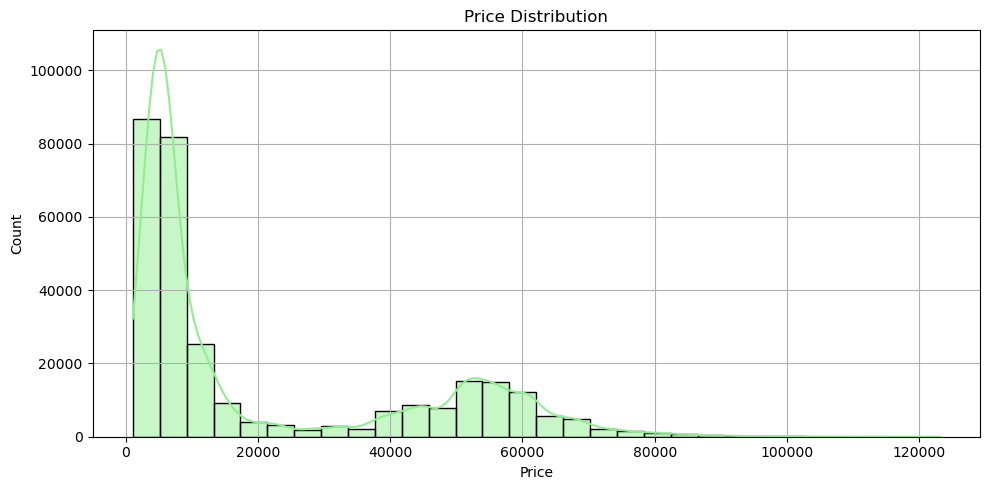

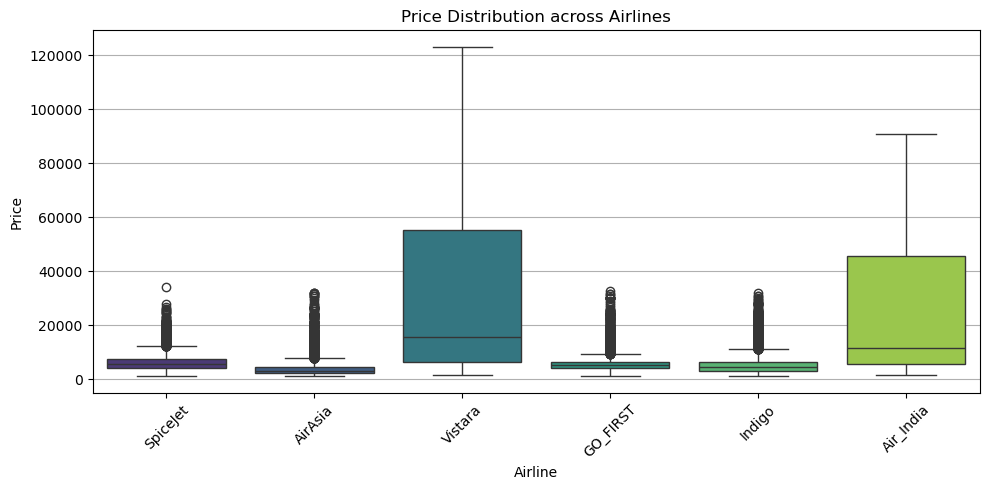

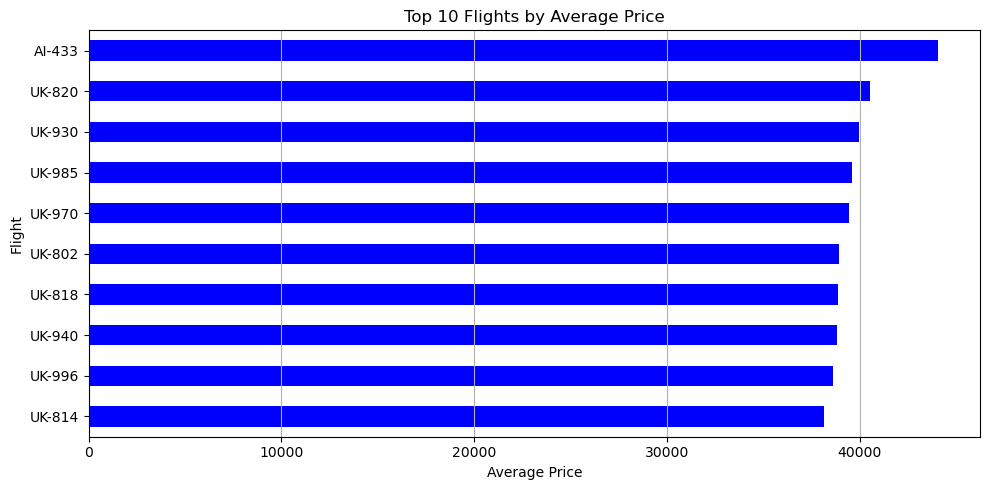

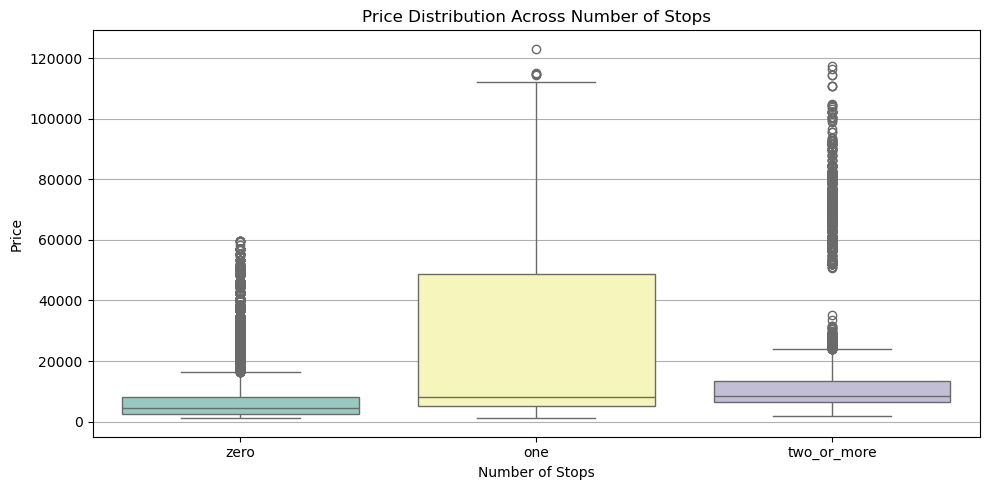

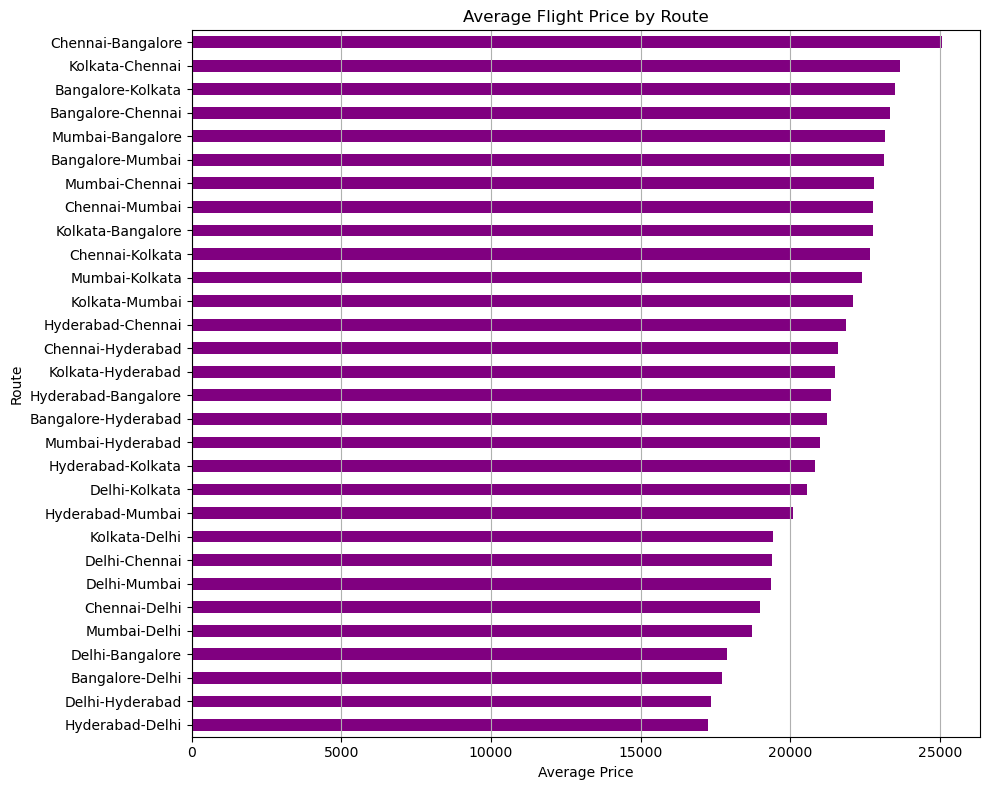

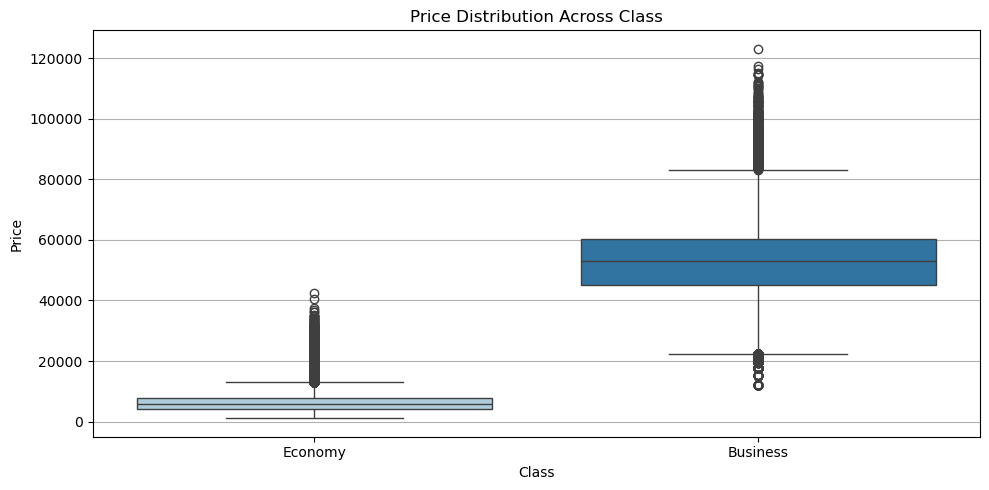

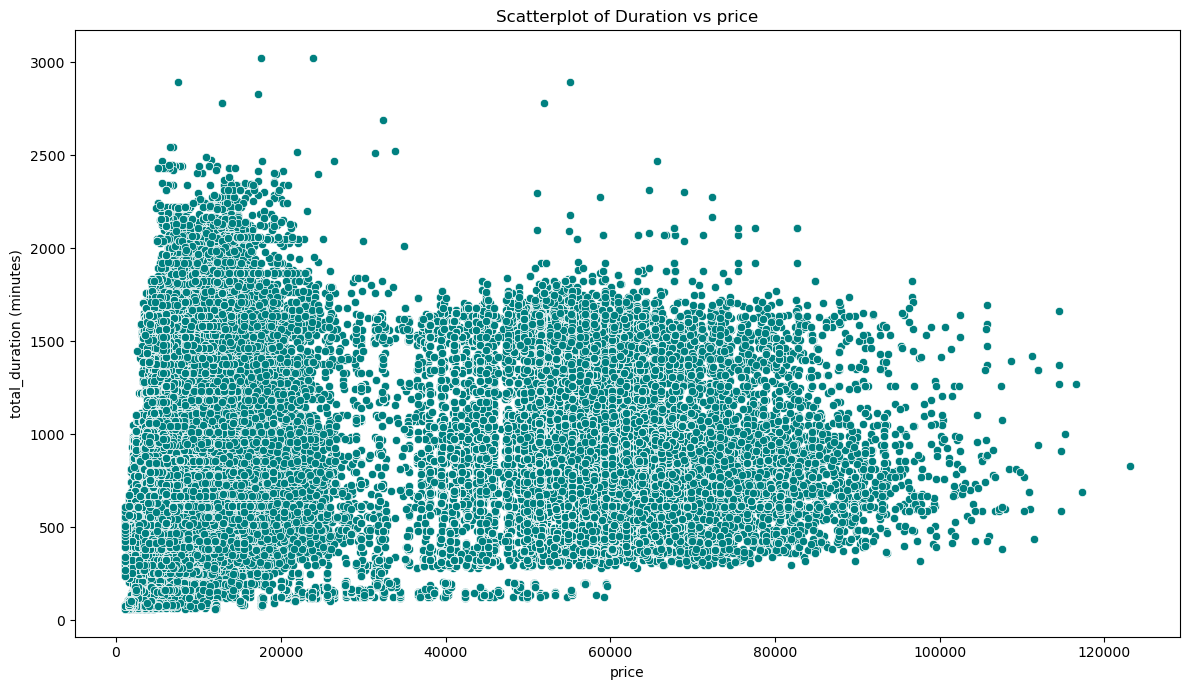

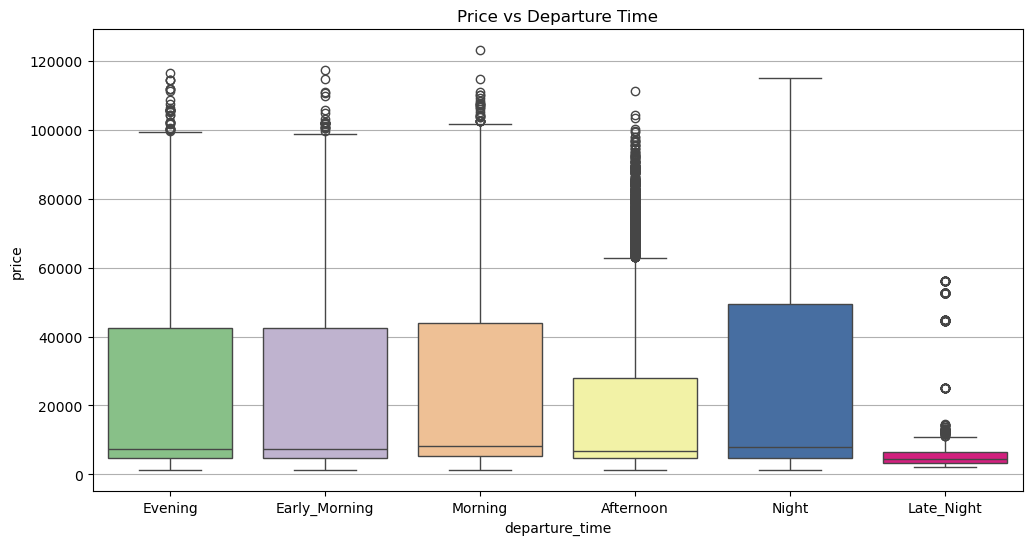

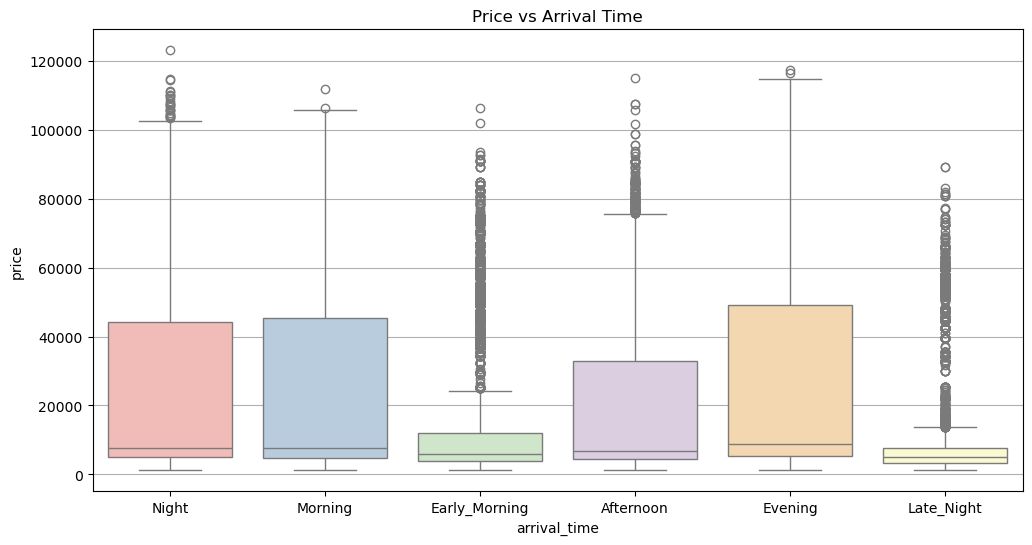

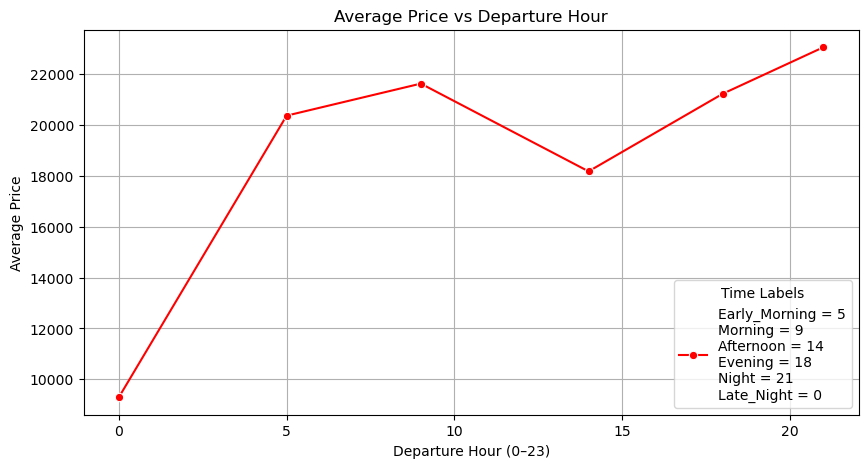

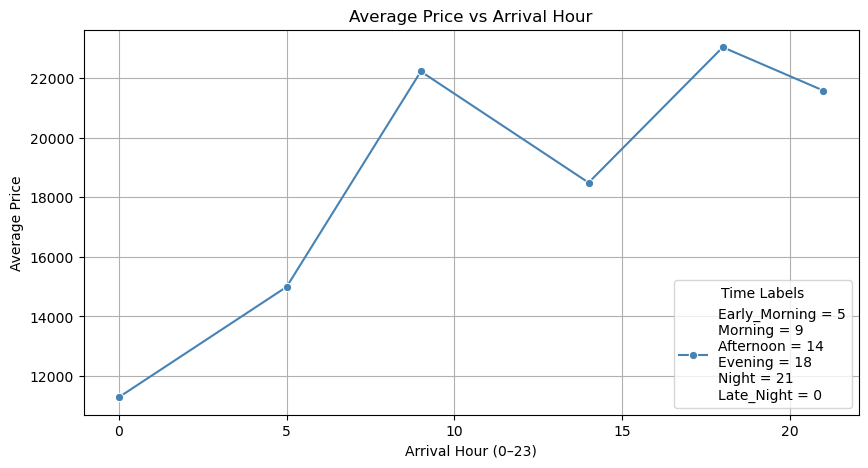

Number of outliers in  Price: 123
None

 ================================================== Interpretation of EDA ================================================== 

 GENERATING INSIGHTS :

1. Histogram - Overall Price Distribution :
- Distribution Shape is Right-skewed 
- Price distribution is bimodal: Main peak has most flights  between 5,000-15,000 (economy), and a secondary peak at 50,000-80,000 (business).
- A few prices above ₹80,000 may be business class, or luxury.


2. Box Plot – Price Distribution Across Airlines:
- AirAsia, SpiceJet, Indigo, GO_FIRST has Low and consistent and most affordable prices and Fewer outliers.
- Vistara and Air India have the highest median prices , widest price ranges and many outliers.
- conclusion :  Vistara and Air India offer premium options. Other airlines mostly target budget segments.


3. Bar Graph – Top 10 Flights By Average Price:
- All top 10 flights have the average price above 38,000 only mainly focusing that they are business class o

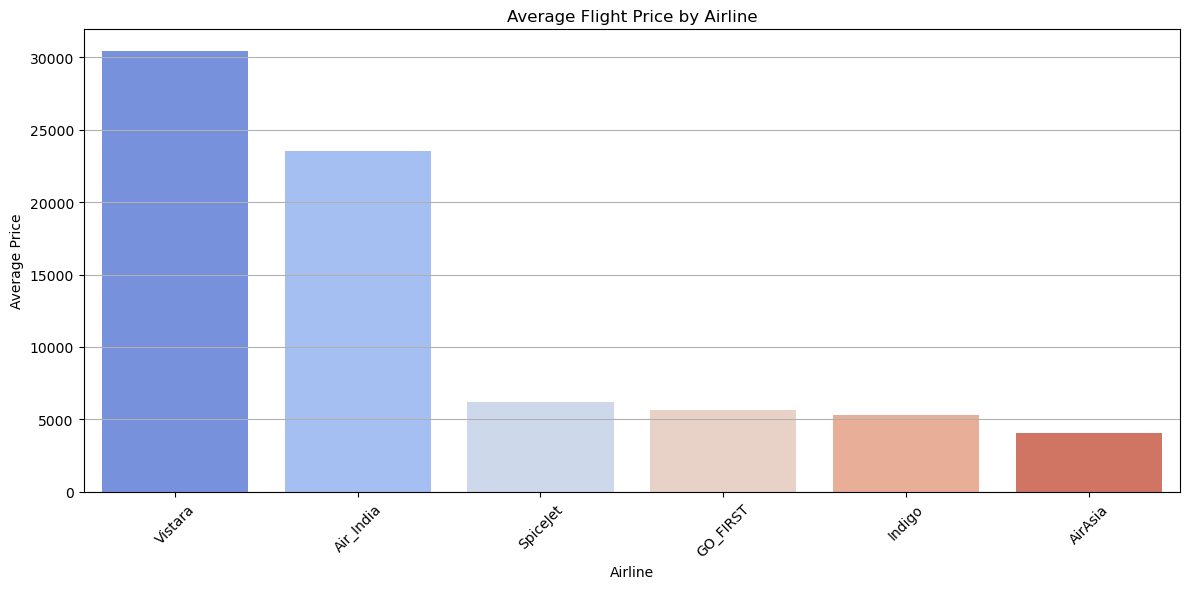

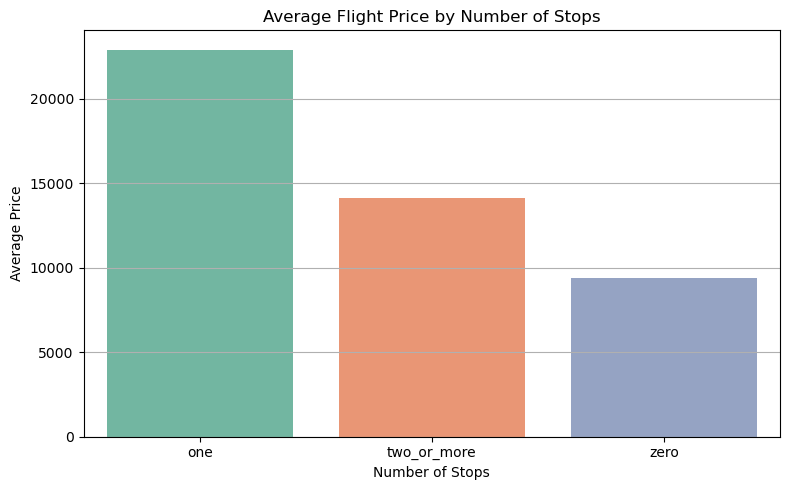

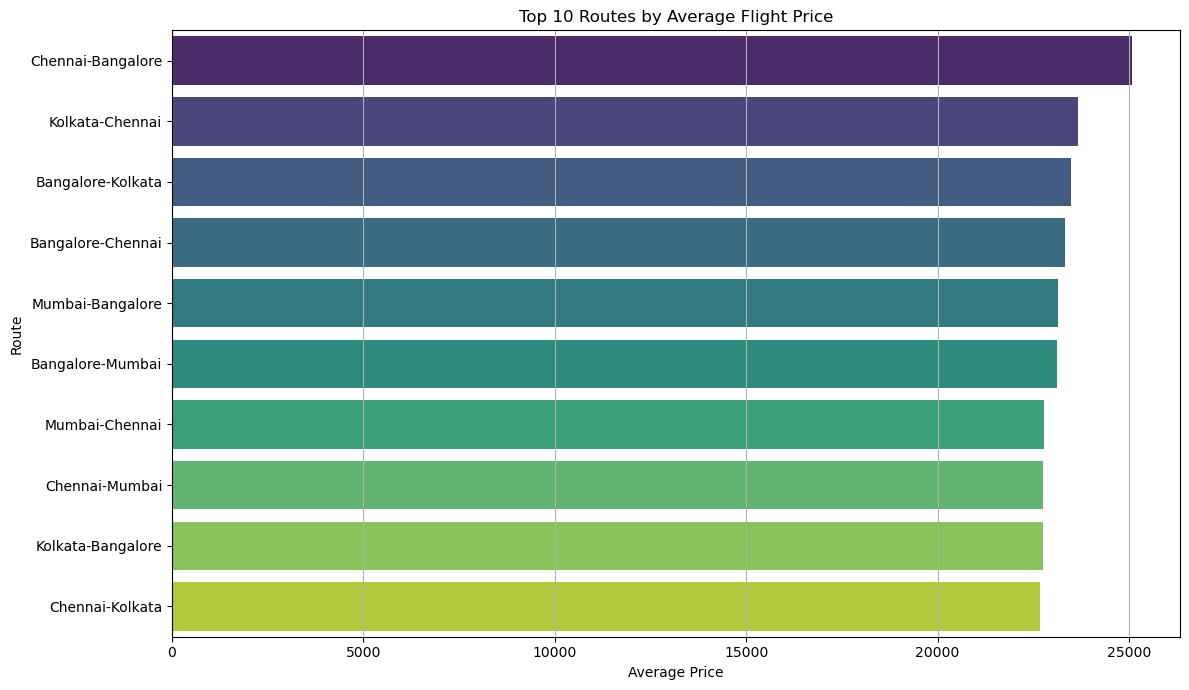

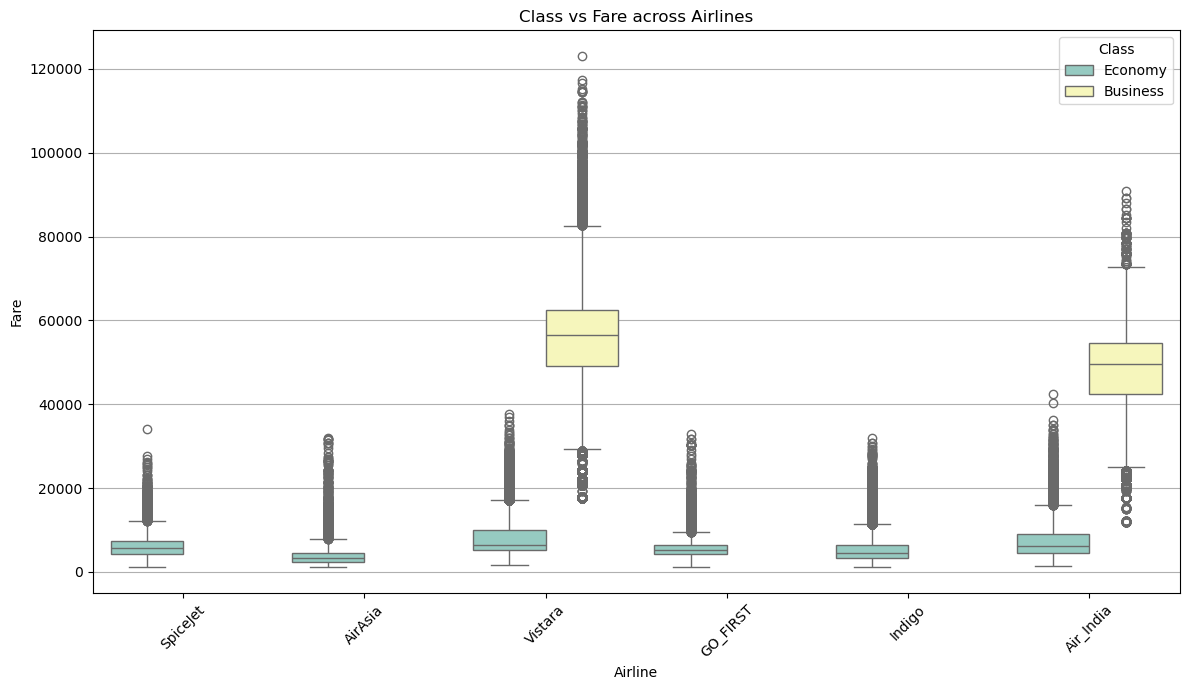

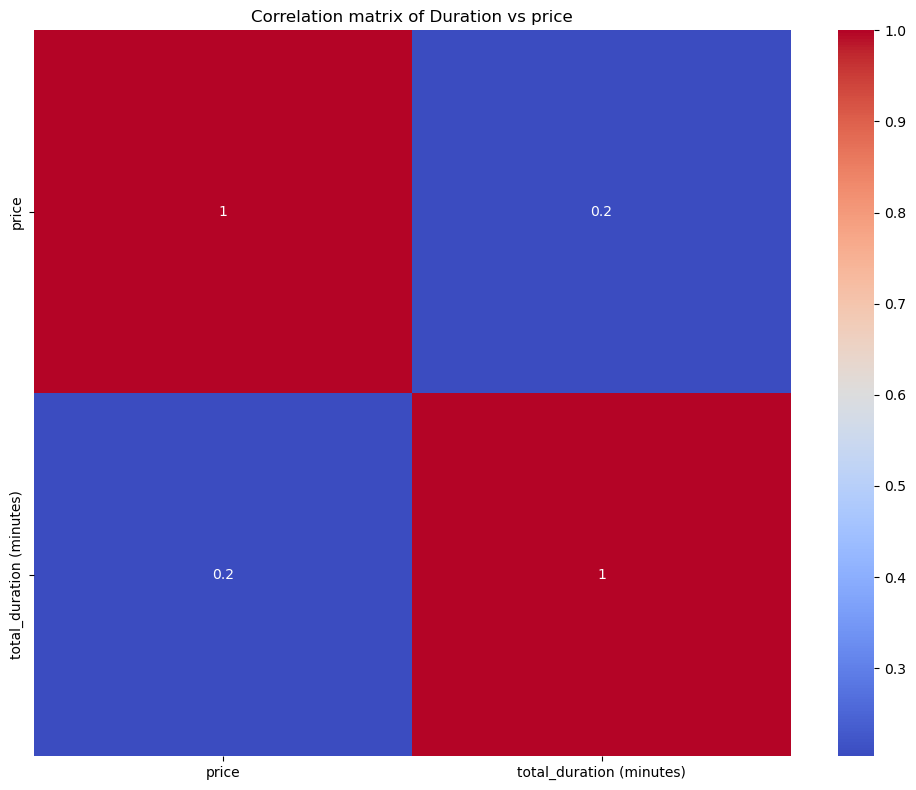

None


In [25]:
pipeline_function()